In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [70]:
results_dir = "results_csv"
passive_file = f"{results_dir}/passive_results.csv"
A2_file = f"{results_dir}/A2_results.csv"

In [71]:
passive_df = pd.read_csv(passive_file)
A2_df = pd.read_csv(A2_file)

In [72]:
comparison_df = pd.merge(passive_df, A2_df, on="dataset", suffixes=("_passive", "_A2"))

In [73]:
print("=== Comparaison Passive vs A² ===")
print(comparison_df[["dataset", "accuracy_passive", "accuracy_A2","n_labels_passive", "n_labels_A2", "time_passive", "time_A2", "learning_curve_passive", "learning_curve_A2"]])

=== Comparaison Passive vs A² ===
       dataset  accuracy_passive  accuracy_A2  n_labels_passive  n_labels_A2  \
0  synthetique             0.665     0.775000               200          156   
1         iris             1.000     0.986667               150           65   

   time_passive   time_A2                             learning_curve_passive  \
0      0.361298  3.727400  [(2, 0.67), (3, 0.775), (4, 0.775), (5, 0.775)...   
1      0.181760  0.955584  [(51, 1.0), (52, 0.9733333333333334), (53, 1.0...   

                                   learning_curve_A2  
0  [(1, 0.36), (2, 0.69), (3, 0.69), (4, 0.69), (...  
1  [(1, 0.6666666666666666), (2, 0.33333333333333...  


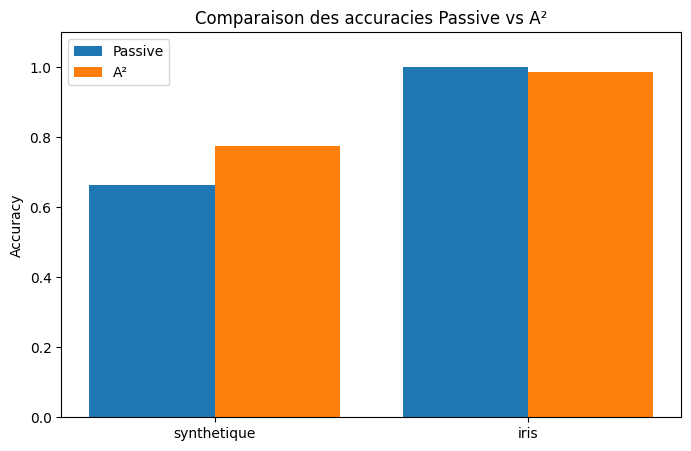

In [74]:
datasets = comparison_df["dataset"]
x = np.arange(len(datasets))  # positions sur l'axe x

# Accuracy comparée
plt.figure(figsize=(8,5))
plt.bar(x-0.2, comparison_df["accuracy_passive"], width=0.4, label="Passive")
plt.bar(x+0.2, comparison_df["accuracy_A2"], width=0.4, label="A²")
plt.xticks(x, datasets)
plt.ylim(0,1.1)
plt.ylabel("Accuracy")
plt.title("Comparaison des accuracies Passive vs A²")
plt.legend()
plt.show()

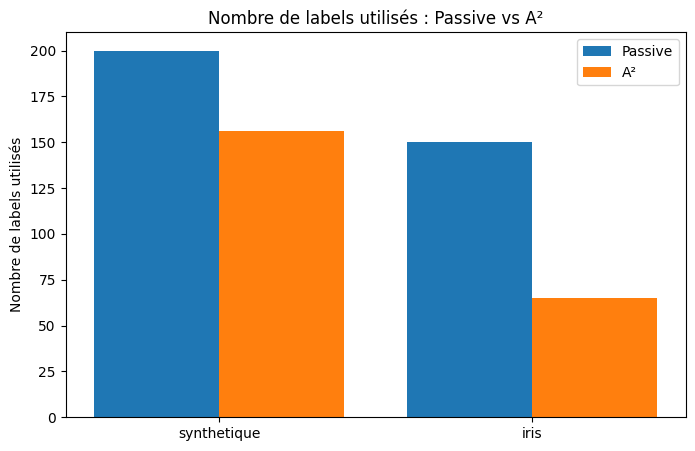

In [75]:
# Nombre de labels utilisés comparé
plt.figure(figsize=(8,5))
plt.bar(x-0.2, comparison_df["n_labels_passive"], width=0.4, label="Passive")
plt.bar(x+0.2, comparison_df["n_labels_A2"], width=0.4, label="A²")
plt.xticks(x, datasets)
plt.ylabel("Nombre de labels utilisés")
plt.title("Nombre de labels utilisés : Passive vs A²")
plt.legend()
plt.show()

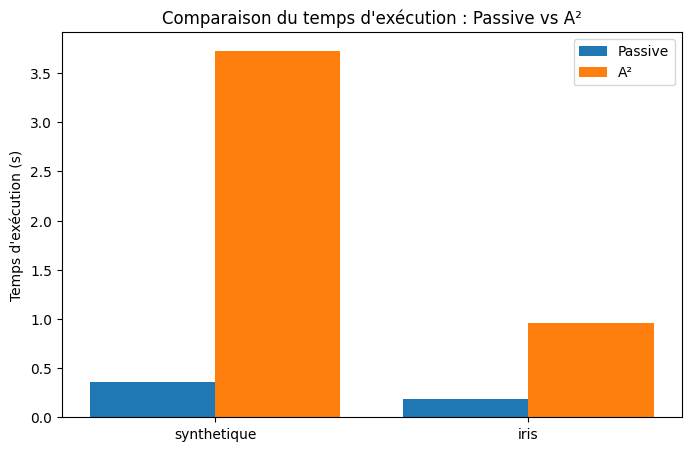

In [76]:
# Comparatif du temps d'exécution
plt.figure(figsize=(8,5))
plt.bar(x-0.2, comparison_df["time_passive"], width=0.4, label="Passive")
plt.bar(x+0.2, comparison_df["time_A2"], width=0.4, label="A²")
plt.xticks(x, datasets)
plt.ylabel("Temps d'exécution (s)")
plt.title("Comparaison du temps d'exécution : Passive vs A²")
plt.legend()
plt.show()

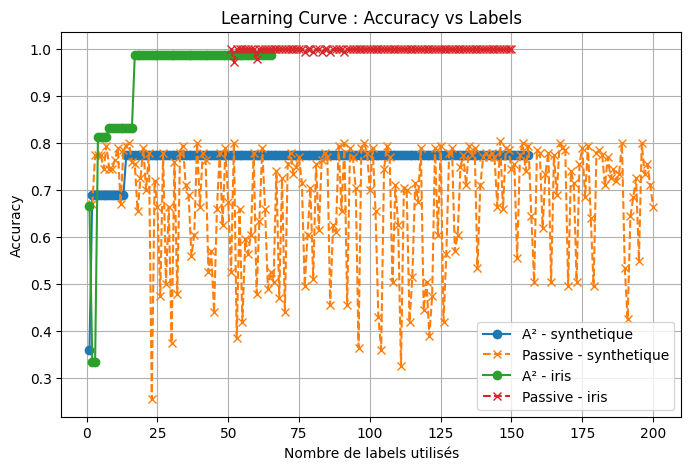

In [77]:
import matplotlib.pyplot as plt
import ast

plt.figure(figsize=(8,5))

for idx, row in comparison_df.iterrows():
    # A²
    lc_a2_str = row.get('learning_curve_A2', None)
    if isinstance(lc_a2_str, str) and lc_a2_str.strip():
        try:
            lc_a2 = ast.literal_eval(lc_a2_str)
            if lc_a2:
                n_labels, acc = zip(*[(int(t[0]), float(t[1])) for t in lc_a2])
                plt.plot(n_labels, acc, marker='o', label=f"A² - {row['dataset']}")
        except Exception as e:
            print(f"Erreur A² pour {row['dataset']}: {e}")

    # Passive
    lc_passive_str = row.get('learning_curve_passive', None)
    if isinstance(lc_passive_str, str) and lc_passive_str.strip():
        try:
            lc_passive = ast.literal_eval(lc_passive_str)
            if lc_passive:
                n_labels, acc = zip(*[(int(t[0]), float(t[1])) for t in lc_passive])
                plt.plot(n_labels, acc, marker='x', linestyle='--', label=f"Passive - {row['dataset']}")
        except Exception as e:
            print(f"Erreur Passive pour {row['dataset']}: {e}")

plt.xlabel("Nombre de labels utilisés")
plt.ylabel("Accuracy")
plt.title("Learning Curve : Accuracy vs Labels")
plt.legend()
plt.grid(True)
plt.show()
